In [1]:
from scipy.stats import binom, norm
import matplotlib.pyplot as plt

# 1. Conceitos de probabilidade

$P(A) = \frac{Número\;de\;casos\;favoráveis\;para\;o\;evento\;A}{Número\;total\;de\;casos\;(S)\;que\;o\;evento\;pode\;ter}$

Propriedades da probabilidade:  
- $0 \leqslant P(A) \leqslant 1$
- $P(S) = 1$
- $P(\phi) = 0$


# 2. Distribuição de probabilidade

Variável aleatória discreta:
- Distruibuição de probabilidade caracterizada por uma função de probabilidade que associa o valor à sua probabilidade de ocorrência.

Variável aleatória contínua:
- $f(x) \geqslant 0$
- $\int_{a}^{b} f(x)dx=P(a \leqslant x \leqslant b)\;para\;(b>a)$
- $\int_{-\infty}^{\infty} f(x)dx = 1$

# 3. Parâmetros das distribuições de probabilidade

**Média**:  

- Variáveis discretas:
    - $E(X)=\mu(x)=\sum_{i} x_{i} \cdot P(x_{i})$ , em que $P(x_{i})$ é a probabilidade de ocorrer o valor $x_{i}$
- Variáveis contínuas:
    - $E(X)=\mu(x)=\int_{-\infty}^{+\infty} x\cdot f(x)dx$  

**Variância**:  

$Var(x)=\sigma^2(x)=E(x^2)-[E(x)]^2$ onde $[E(x)]^2$ é calculado:
- Para variáveis discretas:
    - $\sum_{i}x_{i}^2 \cdot P(x_{i})$
- Para variáveis contínuas:
    - $\int_{-\infty}^{+\infty} x^2 \cdot f(x)dx$

$
\begin{matrix}
Propriedades\;da\;media & Propriedades\;da\;variancia \\
 E(C)=C & \sigma^2(C)=0 \\
 E(C \cdot X)=E(X) \cdot C & \sigma^2(C \cdot X)=\sigma^2(X) \cdot C^2 \\
 E(X\pm Y)=E(X)\pm E(Y) & \sigma^2(X\pm Y)=\sigma^2(X)+\sigma^2(Y) \\
 E(X+C) = E(X)+C & \sigma^2(X+C)=\sigma^2(X) \\
\end{matrix}
$

Em que C é uma constante.

# Distribuição Binomial
Sendo realizadas $n$ observações em condições idênticas, com os dois possíveis resultados de cada observação definidos como "sucesso" ou "fracasso", com cada observação independente das demais e probabilidade de sucesso é igual a $p$ e a de
fracasso falha igual a $1-p$.
- $P(x=d)=\binom{n}{d}\cdot P^d \cdot (1-P)^{n-d}$ 

**Sendo a média e variância dessa distruibuição**:
- $\mu(x)=n \cdot p$
- $\sigma^2(X)=np \cdot (1-p)$

Exemplo: Sabe-se que em um processo de fabricação de suco de tomate a fração de garrafas que
contém volume inferior ao especificado é igual a 0,02. Se ao retirar uma amostra de 400 garrafas
qual é a probabilidade de encontrar no máximo duas garrafas com volume abaixo do especificado?

Distribuição: [0.0003093358658057105, 0.002525190741271115, 0.010281133732318154]


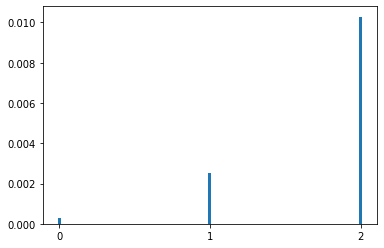

A resposta é dada pela soma das probabilidades das 3 barras: 0.013 = 1.31%


In [2]:
n = 400
p = 0.02
r_values = [0, 1, 2]  # Valores de 0 até 2 garrafas
# Distribuição da probabilidade de todos os valores até 2 garrafas
dist = [binom.pmf(r, n, p) for r in r_values ]
c_prob = sum(dist)  # Probabilidade cumulativa
print('Distribuição:', dist)
# Plot do gráfico
plt.bar(r_values, dist, width=0.02)
plt.xticks(r_values)
plt.show()
print('A resposta é dada pela soma das probabilidades das 3 barras: {:.3f} = {:.2f}%'.format(c_prob, 100*c_prob))

# Distribuição Normal
É o modelo mais importante de distribuição de probabilidade para variáveis contínuas, sendo sua **função densidade**:  
- $f(x)=\frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{\frac{-(x-\mu)^2}{2\sigma^2}}$; $-\infty<x<\infty$
- A definição da distribuição depende apenas da média e da variância
- Curva em formato de sino (Gaussiana)
- Simétrica em torno da média
- **“o mesmo número de desvio padrões delimita áreas iguais”.**

# Distribuição Normal Reduzida 
Estabelece um padrão para facilitar os cálculos com a distribuição normal, caracterizada por:  
- $Z \approx N(\mu=0;\;\sigma^2=1=\sigma)$
- Há valores tabelados que relacionam os valores de $Z$ às suas probabilidades correspondentes
- Algebricamente temos que $Z=\frac{x-\mu}{\sigma}$

Exemplo: Deseja-se calcular a probabilidade de $x \leqslant 16$ onde $x$ é uma variável aleatória contínua com
distribuição normal cuja média é igual a 15 e variância igual a 4.

In [3]:
x = 16
mu = 15
var = 4

def normal_reduzida(x, mu, var):
    """Transforma uma distribuição normal em sua forma reduzida, com média 0 e variância 1"""
    z = (x - mu)/((var)**(1/2))
    return z

Z = normal_reduzida(x, mu, var)
norm_fda = norm.cdf(Z)

print('O valor de Z é {} que corresponde a uma probabilidade de {:.3f}%,\
 de acordo com a distribuição normal reduzida.'.format(Z, norm_fda*100))

O valor de Z é 0.5 que corresponde a uma probabilidade de 69.146%, de acordo com a distribuição normal reduzida.


# Exercícios

#### 1. Um produtor de sementes vende pacotes com 20 sementes cada. Os pacotes que apresentarem mais de uma semente sem germinar serão indenizados. A probabilidade de uma semente germinar 0,98.  

a)      Qual é a probabilidade de um pacote não ser indenizado?  

b)      Se o produtor vende 1000 pacotes, qual é o número esperado de pacotes indenizados?

In [4]:
# a)
n = 20  # Quantidade de sementes
p = 0.02  # Probabilidade de não germinar
r_val = [0, 1]  # Não germinar 0 ou 1 semente
dist = [binom.pmf(r, n, p) for r in r_val]  # Distribuição binomial
c_prob = sum(dist)
print('Distribuição:', dist)
print('A probabilidade de não ser indenizado é de {:.4f}.'.format(sum(dist)))

Distribuição: [0.6676079717550942, 0.27249304969595706]
A probabilidade de não ser indenizado é de 0.9401.


In [5]:
# b)
p_ind = 1 - c_prob
media = p_ind * 1000
print('O valor esperado é de {:.2f} pacotes indenizados.'.format(media))

O valor esperado é de 59.90 pacotes indenizados.


#### 3. Após 28 dias de curagem o cimento Portland comum tem uma resistência compressiva média de 4000 psi. Suponha que essa resistência tenha distribuição normal com desvio padrão de 120 psi. Determine as probabilidades para uma resistência compressiva:  
a) < 3900  b) < 3850  c) > 3850  d) > 3880  e) > 3750 e menor que 4250.

In [6]:
# Dados da distribuição
mu = 4000
desv = 120

In [7]:
# a) Menor que 3900
x = 3900
Z = normal_reduzida(x, mu, desv**2)
norm_fda = norm.cdf(Z)
print('A probabilidade da resistência ser menor que 3900 psi é de {:.3f}.'.format(norm_fda))

A probabilidade da resistência ser menor que 3900 psi é de 0.202.


In [8]:
# b) Menor que 3850
x = 3850
Z = normal_reduzida(x, mu, desv**2)
norm_fda = norm.cdf(Z)
print('A probabilidade da resistência ser menor que 3850 psi é de {:.3f}.'.format(norm_fda))

A probabilidade da resistência ser menor que 3850 psi é de 0.106.


In [9]:
# c) Maior que 3850
x = 3850
Z = normal_reduzida(x, mu, desv**2)
norm_fda = norm.cdf(Z)
prob = 1 - norm_fda
print('A probabilidade da resistência ser maior que 3850 psi é de {:.3f}.'.format(prob))

A probabilidade da resistência ser maior que 3850 psi é de 0.894.


In [10]:
# d) Maior que 3880
x = 3880
Z = normal_reduzida(x, mu, desv**2)
norm_fda = norm.cdf(Z)
prob = 1 - norm_fda
print('A probabilidade da resistência ser maior 3880 psi é de {:.3f}.'.format(prob))

A probabilidade da resistência ser maior 3880 psi é de 0.841.


In [11]:
# e) Entre 3750 e 4250
x1 = 3750
x2 = 4250
Z1 = normal_reduzida(x1, mu, desv**2)
Z2 = normal_reduzida(x2, mu, desv**2)
norm_fda_inferior = norm.cdf(Z1)
norm_fda_superior = norm.cdf(Z2)
prob = norm_fda_superior - norm_fda_inferior
print('A probabilidade da resistência estar entre 3750 psi e 4250 psi é de {:.3f}.'.format(prob))

A probabilidade da resistência estar entre 3750 psi e 4250 psi é de 0.963.
